<a href="https://colab.research.google.com/github/maoramirez69/14MBID/blob/main/4_2048_clasificacion_regresion_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
df_2048 = pd.read_csv('reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_2048_diana2.csv')
df_2048.shape

(1184, 2049)

In [ ]:
df_2048

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,8.301030
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.055517
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.301030
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10.221849
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.698970
1180,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.698970
1181,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.698970
1182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.602060


In [ ]:
X_2048 = df_2048.drop('pIC50', axis=1)
Y_2048 = df_2048.pIC50

In [ ]:
#dividir dataset en entrenamiento y prueba
X_train_2048, X_test_2048, Y_train_2048, Y_test_2048 = train_test_split(X_2048, Y_2048, test_size=0.2,random_state=10)
X_train_2048.shape, Y_train_2048.shape, X_test_2048.shape, Y_test_2048.shape

((947, 2048), (947,), (237, 2048), (237,))

In [ ]:
#Modelo RandomForestRegressor
import numpy as np
model_RFR = RandomForestRegressor(n_estimators=102, max_depth=32, random_state=0, criterion='squared_error',  min_samples_split=2)
model_RFR.fit(X_train_2048, Y_train_2048)
r2 = model_RFR.score(X_test_2048, Y_test_2048)
r2

0.637459659705954

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
model_DTR_2048 = DecisionTreeRegressor(random_state=6, max_depth=24, max_leaf_nodes=100, min_samples_leaf=1, splitter='random')
model_DTR_2048.fit(X_train_2048, Y_train_2048)
predictions = model_DTR_2048.predict(X_test_2048)

#r2 = model1.score(X_test, Y_test)

score = model_DTR_2048.score(X_test_2048, Y_test_2048)
print(score)

0.36902507067724355


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor(n_estimators=100, random_state=0)
ETR_model=ETR.fit(X_train_2048, Y_train_2048)

In [ ]:
Y_pred_2048 =ETR.predict(X_test_2048)

In [ ]:
#calcular media de Y_pred_2048
media = Y_pred_2048.mean()
media

media = 7

#calcular mediana
mediana = np.median(Y_pred_2048)
mediana

5.894761648052459

In [ ]:
Y_train_2048_1 = [1 if i >= mediana else 0 for i in Y_train_2048]

In [ ]:
Y_test_2048_1 = [1 if i >= mediana else 0 for i in Y_test_2048]

In [ ]:
#Importar el modelo
import lightgbm as ltb
#Importar las métricas del modelo 
from sklearn import metrics
#se define el modelo
LGBM_model= ltb.LGBMClassifier()

### SVC

In [ ]:
#usar modelo SVC
from sklearn.svm import SVC
SVC_model = SVC(kernel='linear', C=1, gamma=1)

#predecir con el modelo svc
SVC_model.fit(X_train_2048, Y_train_2048_1)
Y_pred_2048_1 = SVC_model.predict(X_test_2048)

#calcular la exactitud del modelo
print("Accuracy:",metrics.accuracy_score(Y_test_2048_1, Y_pred_2048_1))

Accuracy: 0.8776371308016878


In [ ]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_2048_1, Y_pred_2048_1)

array([[109,   9],
       [ 20,  99]])

No Skill: ROC AUC=0.878
SVC: ROC AUC=0.878


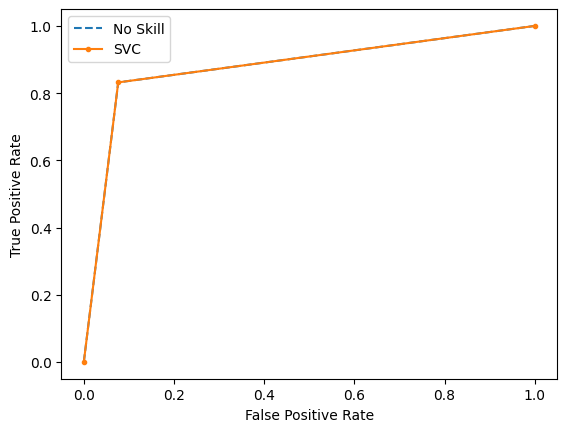

In [ ]:
#Dibujar curva ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# calculate scores
ns_auc = roc_auc_score(Y_test_2048_1, Y_pred_2048_1)
lr_auc = roc_auc_score(Y_test_2048_1, Y_pred_2048_1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test_2048_1, Y_pred_2048_1)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_2048_1, Y_pred_2048_1)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#cañcular el área bajo la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_2048_1, Y_pred_2048_1)

0.8778307933342829

In [ ]:
#calcular metricas de clasificación del modelo SVC
from sklearn.metrics import classification_report
print(classification_report(Y_test_2048_1, Y_pred_2048_1))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       118
           1       0.92      0.83      0.87       119

    accuracy                           0.88       237
   macro avg       0.88      0.88      0.88       237
weighted avg       0.88      0.88      0.88       237



## LGBM

In [ ]:
#Ajuste del modelo con los datos de entrenamiento
LGBM_fit=LGBM_model.fit(X_train_2048,Y_train_2048_1)

In [ ]:
#Hacer predicciones con el modelo (Varible respuesta sólo 0 o 1)
LGBM_pred=LGBM_model.predict(X_test_2048)
print(LGBM_pred)

[0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1
 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0]


In [ ]:
#Hacer predicciones con el modelo (Probabilidades)
LGBM_pred_prob=LGBM_model.predict_proba(X_test_2048)

In [ ]:
#Matriz de confusión
#Se va a contruir la matriz de confusión  para el modelo 
from sklearn.metrics import confusion_matrix
confusion_matrix_LGBM = confusion_matrix(Y_test_2048_1, LGBM_pred)
Conf_matrix_LGBM=print(confusion_matrix_LGBM)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Conf_matrix_LGBM, display_labels=[0,1],)
#mimportar plot
import matplotlib.pyplot as plt

[[105  13]
 [ 17 102]]


In [ ]:
#Métricas del modelo 
from sklearn.metrics import classification_report
nombres=['0','1']
#Métricas del modelo
print(classification_report(Y_test_2048_1, LGBM_pred,target_names=nombres))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       118
           1       0.89      0.86      0.87       119

    accuracy                           0.87       237
   macro avg       0.87      0.87      0.87       237
weighted avg       0.87      0.87      0.87       237



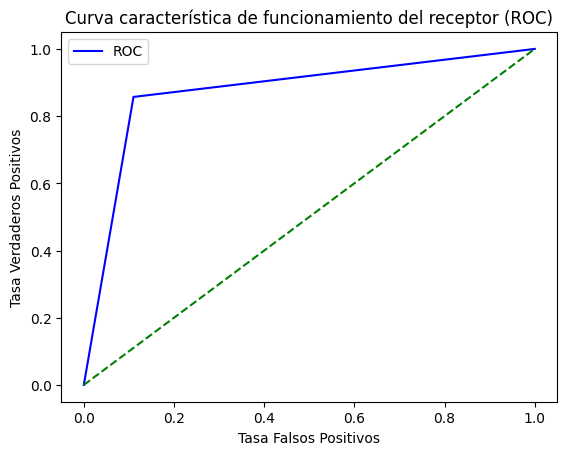

0.8734866828087167


In [ ]:
#Curva ROC del modelo
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

#Definir la función
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('Tasa Falsos Positivos')
    plt.ylabel('Tasa Verdaderos Positivos')
    plt.title('Curva característica de funcionamiento del receptor (ROC)')
    plt.legend()
    plt.show()

#Curva ROC sin reducción de dimensionalidad
fper, tper, thresholds = roc_curve(Y_test_2048_1,LGBM_pred)
plot_roc_curve(fper, tper)
#mostrar el área bajo la curva
auc_score = roc_auc_score(Y_test_2048_1,LGBM_pred)
print(auc_score)

### XGBClassifier

In [ ]:
#Importar el modelo de clasificación
from xgboost import XGBClassifier

In [ ]:
#Ajustar el modelo de clasificación
xgbc = XGBClassifier()

In [ ]:
#Ajustar el modelo de clasificación
xgbc = XGBClassifier()
XGBC_fit=xgbc.fit(X_train_2048,Y_train_2048_1)

XGBC_pred=xgbc.predict(X_test_2048)
print(XGBC_pred)
len(XGBC_pred)

[0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1
 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0]


237

In [ ]:
#Matriz de confusión
#Se va a contruir la matriz de confusión  para el modelo 
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix_XGCB= confusion_matrix(Y_test_2048_1,XGBC_pred)
Conf_matrix_XGCB=print(confusion_matrix_XGCB)
#grafica de matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Conf_matrix_XGCB, display_labels=[0,1],)

#mostrar la matriz de confusión
#importar plot


[[108  10]
 [ 14 105]]


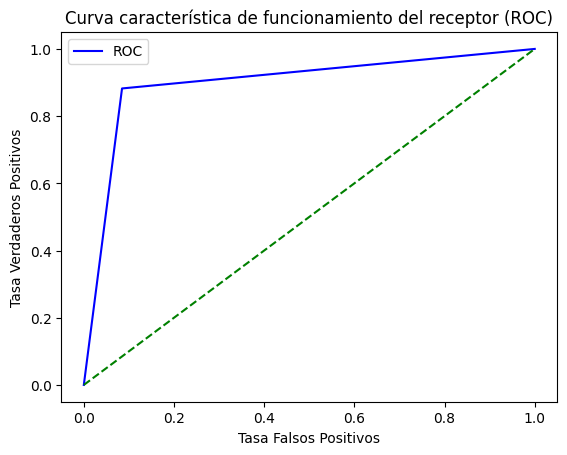

0.8988035892323031


In [ ]:
#Curva ROC sin reducción de dimensionalidad
fper, tper, thresholds = roc_curve(Y_test_2048_1,XGBC_pred)
plot_roc_curve(fper, tper)
#mostrar el área bajo la curva
auc_score = roc_auc_score(Y_test_2048_1,XGBC_pred)
print(auc_score)

In [ ]:
#Métricas del modelo 
from sklearn.metrics import classification_report
nombres=['0','1']
#Métricas del modelo
print(classification_report(Y_test_2048_1, XGBC_pred,target_names=nombres))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.91      0.88      0.90       119

    accuracy                           0.90       237
   macro avg       0.90      0.90      0.90       237
weighted avg       0.90      0.90      0.90       237



In [ ]:
#calcular la precisión del modelo
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_2048_1,XGBC_pred)

0.8987341772151899

### extratreeclassifier

In [ ]:
#Modelo extratreeclassifier
from sklearn.ensemble import ExtraTreesClassifier
#Ajustar el modelo de clasificación
ETC_model = ExtraTreesClassifier()
ETC_fit=ETC_model.fit(X_train_2048,Y_train_2048_1)

ETC_pred=ETC_model.predict(X_test_2048)

#mostrar matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix_ETC= confusion_matrix(Y_test_2048_1,ETC_pred)
Conf_matrix_ETC=print(confusion_matrix_ETC)

[[112   6]
 [ 15 104]]


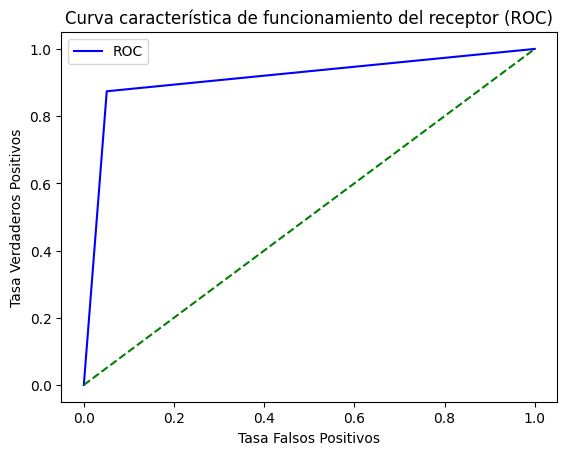

0.9115510611024071


In [ ]:
#dibujar curva ROC
fper, tper, thresholds = roc_curve(Y_test_2048_1,ETC_pred)
plot_roc_curve(fper, tper)
#mostrar el área bajo la curva
auc_score = roc_auc_score(Y_test_2048_1,ETC_pred)
print(auc_score)

In [ ]:
#calcular metricas de clasificación del modelo
from sklearn.metrics import classification_report
print(classification_report(Y_test_2048_1, ETC_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       118
           1       0.95      0.87      0.91       119

    accuracy                           0.91       237
   macro avg       0.91      0.91      0.91       237
weighted avg       0.91      0.91      0.91       237



In [ ]:
#calcular área bajo la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_2048_1, ETC_pred)

0.9115510611024071

In [ ]:
#aplicar modelo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#Ajustar el modelo de clasificación
RFC_model = RandomForestClassifier()
RFC_fit=RFC_model.fit(X_train_2048,Y_train_2048_1)

RFC_pred=RFC_model.predict(X_test_2048)

#mostrar matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix_RFC= confusion_matrix(Y_test_2048_1,RFC_pred)
Conf_matrix_RFC=print(confusion_matrix_RFC)



[[112   6]
 [ 16 103]]


In [ ]:
#ver métricas del modelo
from sklearn.metrics import classification_report
print(classification_report(Y_test_2048_1, RFC_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       118
           1       0.94      0.87      0.90       119

    accuracy                           0.91       237
   macro avg       0.91      0.91      0.91       237
weighted avg       0.91      0.91      0.91       237



## Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#aplicar el modelo de Regresión Logística
LR=LogisticRegression()
LR_fit=LR.fit(X_train_2048,Y_train_2048_1)

LR_pred=LR.predict(X_test_2048)
print(LR_pred)

[0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1
 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0
 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0
 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0]


In [ ]:
Model_clasification=LogisticRegression(random_state=0).fit(X_train_2048,Y_train_2048_1)

In [ ]:
#Información del modelo
print("Intercepto:", Model_clasification.intercept_)
print("Accuracy de entrenamiento:", Model_clasification.score(X_train_2048,Y_train_2048_1))

Intercepto: [0.01984236]
Accuracy de entrenamiento: 0.996832101372756


Se puede apreciar que en el modelo, el valor del intercepto $\beta_{0}=-2.4362289$. Por otroa lado, el modelo tiene un valor de accuracy de entrenamiento. En este caso, el accuracy es $$Accuracy=0.9381$$

Recordemos que, 
$$Accuracy=\frac{VP+VN}{VP+FP+VN+FN}$$

Por lo tanto, el modelo clasifica correctamente  a los datos de entrenamiento en un $93,20\%$.Si bien, la métrica de Accuracy es buena, se considera relevante buscar modelos que  tengan un mayor porcentaje de clasificación con los datos de entrenamiento.

In [ ]:
#calcular métricas del modelo
from sklearn.metrics import classification_report
nombres=['0','1']
#Métricas del modelo
print(classification_report(Y_test_2048_1, LR_pred,target_names=nombres))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       118
           1       0.91      0.87      0.89       119

    accuracy                           0.89       237
   macro avg       0.90      0.89      0.89       237
weighted avg       0.90      0.89      0.89       237



In [ ]:
#cargar dataset de test
df_2048_diana2 = pd.read_csv('reutilizacion_2048_diana2.csv')
df_2048_diana2.shape

(15060, 2049)

In [ ]:
#quitar columna pIC50 del dataset de test
df_2048_diana2 = df_2048_diana2.drop(['pIC50'], axis=1)

In [ ]:
#probar Model_clasification con dataset df_2048_diana2
Model_clasification.predict(df_2048_diana2)

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#ver el resultado de la predicción
df_2048_diana2['prediccion']=Model_clasification.predict(df_2048_diana2)

In [ ]:
#ver valores 1 y 0 de la columna pIC50 con su respectivo indice
df_2048_diana2['prediccion'].value_counts()

1    7863
0    7197
Name: prediccion, dtype: int64

In [ ]:
#asignar array a pandas dataframe
df_2048_diana2 = pd.DataFrame(df_2048_diana2)

In [ ]:
df_2048_diana2

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,prediccion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#combinar datasets
df_2048_pic50 = pd.read_csv('reutilizacion_2048.csv')
df_2048_pic50

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.301030
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.000000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.540608
15056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.832683
15057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.219683
15058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.540608


In [ ]:
#hacer join entre df_2048_diana2 y df_2048_pic50 por indice trayendo todas las columnas de df_2048 y solo la columna pIC50 de df_2048_pic50
df_2048_diana2_pic50_1 = df_2048_diana2.join(df_2048_pic50['pIC50'])
#filtrar por predicción 1
df_2048_diana2_pic50_1 = df_2048_diana2_pic50_1[df_2048_diana2_pic50_1['prediccion']==1]
#eliminar columna prediccion
df_2048_diana2_pic50_1 = df_2048_diana2_pic50_1.drop(['prediccion'], axis=1)
df_2048_diana2_pic50_1

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.000000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
11,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.886057
15048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.761954
15052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.920819
15057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.219683


In [ ]:
df_2048_diana2_pic50_1= df_2048_diana2_pic50_1.drop(['pIC50'], axis=1)

In [ ]:
#eliminar columna pIC50
#df_2048_diana2_pic50_1 = df_2048_diana2_pic50_1.drop(['pIC50'], axis=1)
#predecir valor de pIC50 con el modelo
df_2048_diana2_pic50_1['pIC50']=model_RFR.predict(df_2048_diana2_pic50_1)
df_2048_diana2_pic50_1

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.030383
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.380736
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.038574
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.622145
11,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.246451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.261565
15048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.684223
15052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.610622
15057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.510048


In [ ]:
#ordenar dataframe por pIC50 de forma descendente
df_2048_diana2_pic50_1 = df_2048_diana2_pic50_1.sort_values(by=['pIC50'], ascending=False)
df_2048_diana2_pic50_1

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
6095,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.715177
6090,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.397083
6084,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.388574
6086,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.380579
6092,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.350429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.584334
1867,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.490078
5627,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.456951
1868,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.367908


In [ ]:
#contar valores de pIC50 por encima de la mediana
df_2048_diana2_pic50_1[df_2048_diana2_pic50_1['pIC50']>=df_2048_diana2_pic50_1['pIC50'].mean()].count()

Col_0       3598
Col_1       3598
Col_2       3598
Col_3       3598
Col_4       3598
            ... 
Col_2044    3598
Col_2045    3598
Col_2046    3598
Col_2047    3598
pIC50       3598
Length: 2049, dtype: int64

In [ ]:
df_2048_diana2_pic50_1

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
6095,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.715177
6090,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.397083
6084,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.388574
6086,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.380579
6092,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,10.350429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.584334
1867,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.490078
5627,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.456951
1868,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.367908


In [ ]:
#cargar dataset de reutilizacion con descriptores de lipinski
df_reutilizacion = pd.read_csv('reutilizacion_04_bioactivity_data_3class_pIC50_1.csv')
#renombra columna pIC50 a pIC50_1
df_reutilizacion.rename(columns={'pIC50': 'pIC50_1'}, inplace=True)
#borrar columna UnaUnnamed: 0
df_reutilizacion = df_reutilizacion.drop(['Unnamed: 0'], axis=1)
df_reutilizacion

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50_1
0,CHEMBL660279,activo,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,262.165,2.9619,2.0,2.0,7.301030
1,CHEMBL660279,inactivo,C/C(=N\NC(N)=O)c1cccc(Cl)c1,211.652,1.7323,2.0,2.0,5.000000
2,CHEMBL816826,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0,4.000000
3,CHEMBL660279,inactivo,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,300.225,3.0684,2.0,2.0,5.000000
4,CHEMBL660279,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,394.725,4.9093,1.0,2.0,6.000000
...,...,...,...,...,...,...,...,...
15055,CHEMBL4840217,inactivo,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,309.123,2.4886,1.0,6.0,4.540608
15056,CHEMBL4840217,inactivo,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,310.107,2.6120,1.0,6.0,4.832683
15057,CHEMBL4840217,inactivo,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,310.176,3.3749,0.0,5.0,4.219683
15058,CHEMBL4840217,inactivo,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,309.188,3.9799,0.0,4.0,4.540608


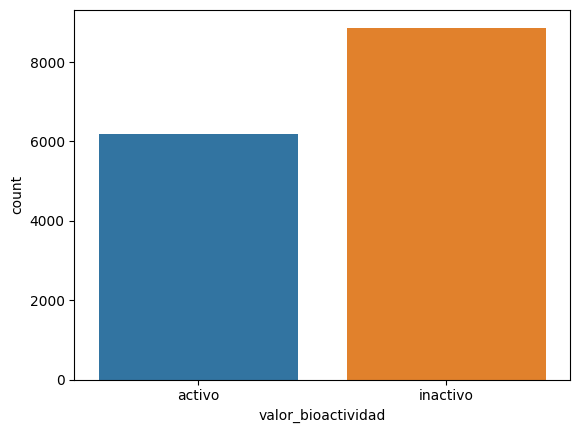

In [ ]:
#ver distribución por clases de vallor_bioactividad
df_reutilizacion['valor_bioactividad'].value_counts()

#graficar
import seaborn as sns
sns.countplot(x='valor_bioactividad', data=df_reutilizacion)

#eliminar columnas con valores nulos
df_reutilizacion = df_reutilizacion.dropna()

#graficar
import seaborn as sns
sns.countplot(x='valor_bioactividad', data=df_reutilizacion)
plt.show()

In [ ]:
#eliminar duplicados
df_reutilizacion = df_reutilizacion.drop_duplicates(subset=['canonical_smiles'], keep='first')
df_reutilizacion

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50_1
0,CHEMBL660279,activo,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,262.165,2.9619,2.0,2.0,7.301030
1,CHEMBL660279,inactivo,C/C(=N\NC(N)=O)c1cccc(Cl)c1,211.652,1.7323,2.0,2.0,5.000000
2,CHEMBL816826,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0,4.000000
3,CHEMBL660279,inactivo,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,300.225,3.0684,2.0,2.0,5.000000
4,CHEMBL660279,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,394.725,4.9093,1.0,2.0,6.000000
...,...,...,...,...,...,...,...,...
15055,CHEMBL4840217,inactivo,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,309.123,2.4886,1.0,6.0,4.540608
15056,CHEMBL4840217,inactivo,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,310.107,2.6120,1.0,6.0,4.832683
15057,CHEMBL4840217,inactivo,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,310.176,3.3749,0.0,5.0,4.219683
15058,CHEMBL4840217,inactivo,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,309.188,3.9799,0.0,4.0,4.540608


In [ ]:
#realizar cruce entre df_2048_diana2_pic50_1 y df_reutilizacion por el indice tipo left trayendo todas las columnas de df_reutilizacion y solo la columna pIC50 de df_2048_diana2_pic50_1
df_reutilizacion_1 = df_reutilizacion.join(df_2048_diana2_pic50_1['pIC50'])
df_reutilizacion_1
#traer solo valores que tenga pIC50 diferente de NaN
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['pIC50'].notna()]
df_reutilizacion_1

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50_1,pIC50
3,CHEMBL660279,inactivo,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,300.225,3.06840,2.0,2.0,5.000000,6.030383
4,CHEMBL660279,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,394.725,4.90930,1.0,2.0,6.000000,6.380736
5,CHEMBL660279,inactivo,CCC(N/N=C(/N)S)c1cccc(Br)c1,288.214,2.64930,3.0,2.0,5.000000,7.038574
10,CHEMBL660279,inactivo,FC(F)(F)c1ccc(NC(=S)N2CCC(c3cccc(Br)c3)=N2)cc1,428.277,5.27470,1.0,2.0,5.000000,6.622145
11,CHEMBL660279,inactivo,CC/C(=N\N=C(/S)Nc1ccccc1)c1cccc(Br)c1,362.296,4.96110,2.0,2.0,5.000000,6.246451
...,...,...,...,...,...,...,...,...,...
15024,CHEMBL4838441,inactivo,COc1ccc(-c2cc(N3CCN(c4ccccc4O)CC3)c(C#N)c(=O)o...,403.438,3.21928,1.0,7.0,4.886057,7.261565
15048,CHEMBL4840217,inactivo,BrC1=NOC(c2nc(-c3ccccc3)no2)C1,294.108,2.90640,0.0,5.0,4.761954,6.684223
15052,CHEMBL4840217,inactivo,COc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,324.134,2.91500,0.0,6.0,4.920819,6.610622
15057,CHEMBL4840217,inactivo,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,310.176,3.37490,0.0,5.0,4.219683,6.510048


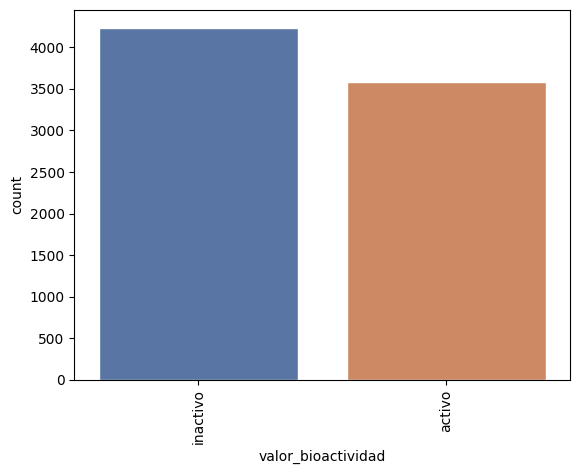

In [ ]:
#graficar clases de valor_bioactividad por frecuencias
df_reutilizacion_1['valor_bioactividad'].value_counts().plot(kind='bar')

#mostrar grafica con colores de valor_bioactividad
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="valor_bioactividad", data=df_reutilizacion_1)
plt.show()

In [ ]:
#Escoger solo valores de clase activo
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['valor_bioactividad']=='activo']
df_reutilizacion_1

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50_1,pIC50
4,CHEMBL660279,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,394.725,4.90930,1.0,2.0,6.000000,6.380736
14,CHEMBL660279,activo,CC1CN(C(=N)S)N=C1c1cccc(Cl)c1,253.758,2.86037,2.0,2.0,6.638272,5.786910
16,CHEMBL660279,activo,N=C(S)N1CCC(c2cccc(C(F)(F)F)c2)=N1,273.283,2.97977,2.0,2.0,7.096910,6.237362
24,CHEMBL660279,activo,COc1ccccc1-c1ccc(/C=N/N=C(/N)S)o1,275.333,2.53360,2.0,4.0,6.552842,6.960421
31,CHEMBL660279,activo,N/C(S)=N/N=C/c1ccc(-c2cccc(Cl)c2)o1,279.752,3.17840,2.0,3.0,6.853872,6.410404
...,...,...,...,...,...,...,...,...,...
14996,CHEMBL4835658,activo,COc1ccc2c3c1C(=O)C[C@]1(C)Oc4c(cc(-c5c(O)cc(OC...,796.961,9.12832,2.0,10.0,6.131944,7.884546
15014,CHEMBL4838018,activo,Cc1cc(O)cc(O)c1C(=O)OCCCCCCCCCCCCCC[n+]1ccc(/C...,735.804,5.81072,3.0,6.0,6.443697,7.183678
15015,CHEMBL4838018,activo,CCOC(=O)c1cc(C)c(C(=O)OCCCCCCCCCCCCCC[n+]2ccc(...,791.868,6.28182,2.0,7.0,8.795880,7.394417
15016,CHEMBL4838018,activo,Cc1cc(O)cc(OCCCCCCCCCCCCCC[n+]2ccc(/C=C/c3cc4c...,691.795,6.32712,2.0,4.0,6.838632,7.968895


In [ ]:
#escoger valores para peso molecular menor a 500
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['Peso_Molecular']<=500]
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['Peso_Molecular']>=1]
df_reutilizacion_1

#escoger muestra aleatoria de 2051 valores
df_reutilizacion_1 = df_reutilizacion_1.sample(n=2051, random_state=1)
df_reutilizacion_1

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50_1,pIC50
37,CHEMBL660279,activo,N/C(S)=N/N=C/c1ccc(-c2ccc(Cl)cc2)o1,279.752,3.17840,2.0,3.0,6.522879,6.385818
10976,CHEMBL3815295,activo,CN1CCN(CCN2CC3C(c4ccccc4)CC(N(C)C)(CC3c3ccccc3...,446.683,3.82740,0.0,4.0,6.568636,7.519157
12646,CHEMBL4310407,activo,COc1ccc(C(c2c(O)c3ccccc3oc2=O)c2c(O)c3ccccc3oc...,472.449,4.50800,2.0,8.0,6.802719,8.196592
2869,CHEMBL1058987,activo,CC(C)NC(=N)c1ccc2cc(-c3ccc(OCCCCCCOc4ccccc4)cc...,470.613,7.44137,2.0,4.0,6.053548,7.569335
4171,CHEMBL1686417,activo,N=C(N)Nc1cccc(CN2C(=O)[C@H](Cc3ccccc3)N=C(C3CC...,479.628,5.51947,3.0,3.0,6.031517,6.877717
...,...,...,...,...,...,...,...,...,...
10376,CHEMBL3583600,activo,CC/C=C/CCC[C@@H]1C[C@@H]2CC[C@@H]3C[C@@H](CCCC...,473.624,4.40530,2.0,4.0,9.619789,6.460238
10978,CHEMBL3815295,activo,CN(C)C12CC(c3ccccc3)C(CN(CCCN3CCCC3)C1)C(c1ccc...,431.668,5.06590,0.0,3.0,6.795880,7.130356
9040,CHEMBL3223829,activo,CN1/C(=C/C=C/c2oc3ccccc3[n+]2C)Sc2ccccc21,356.878,1.35800,0.0,3.0,6.732828,7.247946
5414,CHEMBL1862746,activo,CCCC(CCC)NCc1coc(-c2ccccc2OCC)n1,316.445,4.79870,1.0,4.0,8.754487,8.483990


In [ ]:
#logS menor a 5
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['LogP']<=5]
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['LogP']>=1]
df_reutilizacion_1

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50_1,pIC50
37,CHEMBL660279,activo,N/C(S)=N/N=C/c1ccc(-c2ccc(Cl)cc2)o1,279.752,3.1784,2.0,3.0,6.522879,6.385818
10976,CHEMBL3815295,activo,CN1CCN(CCN2CC3C(c4ccccc4)CC(N(C)C)(CC3c3ccccc3...,446.683,3.8274,0.0,4.0,6.568636,7.519157
12646,CHEMBL4310407,activo,COc1ccc(C(c2c(O)c3ccccc3oc2=O)c2c(O)c3ccccc3oc...,472.449,4.5080,2.0,8.0,6.802719,8.196592
6566,CHEMBL2093839,activo,O=S(=O)(NCC(c1cccnc1)N1CCN(c2ccccc2F)CC1)c1cc(...,476.524,3.3407,1.0,5.0,8.323947,6.258154
3163,CHEMBL1050693,activo,O=C(/C=C/c1ccc(-n2ccnc2)cc1)c1ccc(Cl)cc1,308.768,4.4218,0.0,3.0,9.036212,7.037374
...,...,...,...,...,...,...,...,...,...
4760,CHEMBL1862746,activo,CCCCc1ccc(-c2nc(CNC3CCCC3)co2)cc1,298.430,4.7164,1.0,3.0,9.080922,9.130082
10376,CHEMBL3583600,activo,CC/C=C/CCC[C@@H]1C[C@@H]2CC[C@@H]3C[C@@H](CCCC...,473.624,4.4053,2.0,4.0,9.619789,6.460238
9040,CHEMBL3223829,activo,CN1/C(=C/C=C/c2oc3ccccc3[n+]2C)Sc2ccccc21,356.878,1.3580,0.0,3.0,6.732828,7.247946
5414,CHEMBL1862746,activo,CCCC(CCC)NCc1coc(-c2ccccc2OCC)n1,316.445,4.7987,1.0,4.0,8.754487,8.483990


In [ ]:
#Num_Donadores_H en el rango de 1 a 5
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['Num_Donadores_H']<5]
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['Num_Donadores_H']>=1]
df_reutilizacion_1

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50_1,pIC50
37,CHEMBL660279,activo,N/C(S)=N/N=C/c1ccc(-c2ccc(Cl)cc2)o1,279.752,3.17840,2.0,3.0,6.522879,6.385818
12646,CHEMBL4310407,activo,COc1ccc(C(c2c(O)c3ccccc3oc2=O)c2c(O)c3ccccc3oc...,472.449,4.50800,2.0,8.0,6.802719,8.196592
6566,CHEMBL2093839,activo,O=S(=O)(NCC(c1cccnc1)N1CCN(c2ccccc2F)CC1)c1cc(...,476.524,3.34070,1.0,5.0,8.323947,6.258154
737,CHEMBL707041,activo,COc1ccc(Cc2nnc(O)c3ccccc23)cc1,266.300,2.93480,1.0,4.0,7.000000,7.056860
3529,CHEMBL1112844,activo,N=C(N)c1ccc(-c2ncc(-c3ccc(C(=N)N)nc3)s2)cc1,395.319,3.28384,4.0,5.0,8.221849,6.881218
...,...,...,...,...,...,...,...,...,...
4450,CHEMBL1799418,activo,COc1ccccc1C(=O)c1cnc(NC2CCN(C(=O)Nc3ccccc3)CC2...,431.496,3.82460,2.0,6.0,6.481486,6.434089
4760,CHEMBL1862746,activo,CCCCc1ccc(-c2nc(CNC3CCCC3)co2)cc1,298.430,4.71640,1.0,3.0,9.080922,9.130082
10376,CHEMBL3583600,activo,CC/C=C/CCC[C@@H]1C[C@@H]2CC[C@@H]3C[C@@H](CCCC...,473.624,4.40530,2.0,4.0,9.619789,6.460238
5414,CHEMBL1862746,activo,CCCC(CCC)NCc1coc(-c2ccccc2OCC)n1,316.445,4.79870,1.0,4.0,8.754487,8.483990


In [ ]:
#Num_Aceptores en el rango de 1 a 10
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['Num_Aceptores']<10]
df_reutilizacion_1 = df_reutilizacion_1[df_reutilizacion_1['Num_Aceptores']>=1]
df_reutilizacion_1

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50_1,pIC50
37,CHEMBL660279,activo,N/C(S)=N/N=C/c1ccc(-c2ccc(Cl)cc2)o1,279.752,3.17840,2.0,3.0,6.522879,6.385818
12646,CHEMBL4310407,activo,COc1ccc(C(c2c(O)c3ccccc3oc2=O)c2c(O)c3ccccc3oc...,472.449,4.50800,2.0,8.0,6.802719,8.196592
6566,CHEMBL2093839,activo,O=S(=O)(NCC(c1cccnc1)N1CCN(c2ccccc2F)CC1)c1cc(...,476.524,3.34070,1.0,5.0,8.323947,6.258154
737,CHEMBL707041,activo,COc1ccc(Cc2nnc(O)c3ccccc23)cc1,266.300,2.93480,1.0,4.0,7.000000,7.056860
3529,CHEMBL1112844,activo,N=C(N)c1ccc(-c2ncc(-c3ccc(C(=N)N)nc3)s2)cc1,395.319,3.28384,4.0,5.0,8.221849,6.881218
...,...,...,...,...,...,...,...,...,...
4450,CHEMBL1799418,activo,COc1ccccc1C(=O)c1cnc(NC2CCN(C(=O)Nc3ccccc3)CC2...,431.496,3.82460,2.0,6.0,6.481486,6.434089
4760,CHEMBL1862746,activo,CCCCc1ccc(-c2nc(CNC3CCCC3)co2)cc1,298.430,4.71640,1.0,3.0,9.080922,9.130082
10376,CHEMBL3583600,activo,CC/C=C/CCC[C@@H]1C[C@@H]2CC[C@@H]3C[C@@H](CCCC...,473.624,4.40530,2.0,4.0,9.619789,6.460238
5414,CHEMBL1862746,activo,CCCC(CCC)NCc1coc(-c2ccccc2OCC)n1,316.445,4.79870,1.0,4.0,8.754487,8.483990


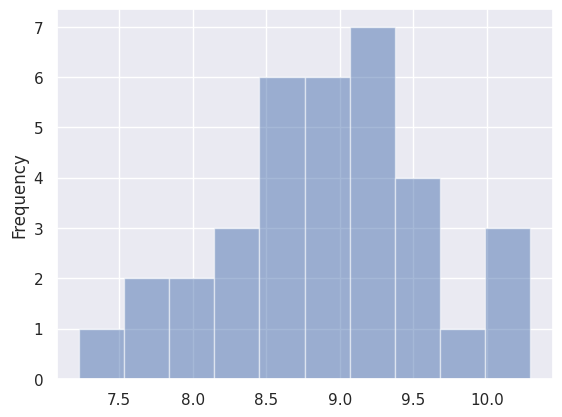

In [ ]:
#ver distribucion de pIC50 en rangos de 0.5
df_reutilizacion_1['pIC50'].plot.hist(bins=10, alpha=0.5)

#graficar
plt.show()

In [ ]:
#verl columnas
df_reutilizacion_1.columns

Index(['molecule_chembl_id', 'valor_bioactividad', 'canonical_smiles',
       'Peso_Molecular', 'LogP', 'Num_Donadores_H', 'Num_Aceptores', 'pIC50_1',
       'pIC50'],
      dtype='object')

In [ ]:
#eliminar columnas pIC50_1
#df_reutilizacion_1 = df_reutilizacion_1.drop(['pIC50_1'], axis=1)

#ordenar de forma ascendente por Peso_Molecular
df_reutilizacion_1 = df_reutilizacion_1.sort_values(by=['Peso_Molecular'], ascending=True)
#ordenar de forma ascendente por LogP
df_reutilizacion_1 = df_reutilizacion_1.sort_values(by=['LogP'], ascending=True)

#ordenar de forma ascendente por Num_Donadores_H
df_reutilizacion_1 = df_reutilizacion_1.sort_values(by=['Num_Donadores_H'], ascending=True)

#ordenar de forma ascendente por Num_Aceptores
df_reutilizacion_1 = df_reutilizacion_1.sort_values(by=['Num_Aceptores'], ascending=True)
df_reutilizacion_1

#ordernar de forma descendente por pIC50
df_reutilizacion_1 = df_reutilizacion_1.sort_values(by=['pIC50'], ascending=False)
df_reutilizacion_1

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50_1,pIC50
6093,CHEMBL2038396,activo,O=C(/C=C/c1ccc2c(c1)B(O)OC2)c1ccc2c(c1)OCCO2,322.125,1.57160,1.0,5.0,10.096910,10.293752
6078,CHEMBL2038396,activo,O=C(/C=C/c1ccc2c(c1)B(O)OC2)c1cccc(F)c1,282.079,1.93950,1.0,3.0,10.337242,10.284215
6085,CHEMBL2038396,activo,O=C(/C=C/c1ccc2c(c1)B(O)OC2)c1ccccc1O,280.088,1.50600,2.0,4.0,9.764472,10.097511
9158,CHEMBL3265600,activo,O=C(c1ccc(Cl)cc1Cl)c1cccn1-c1ccc2c(c1)B(O)OC2,372.016,3.23280,1.0,4.0,8.844664,9.762553
6056,CHEMBL2038396,activo,O=C(/C=C/c1ccc2c(c1)B(O)OC2)c1ccc(-c2ccccc2)cc1,340.187,3.46740,1.0,3.0,9.360514,9.626502
9174,CHEMBL3265600,activo,COc1ccccc1C(=O)c1ccn(-c2ccc3c(c2)B(O)OC3)c1,333.152,1.93460,1.0,5.0,9.769551,9.572997
4723,CHEMBL1862746,activo,Cc1ccc(/C(=N/O)NCC(C)(C)C)c(Oc2cccc(F)c2)n1,331.391,4.09292,2.0,4.0,9.346787,9.405823
9166,CHEMBL3265600,activo,O=C(c1ccc(F)cc1)c1ccn(-c2ccc3c(c2)B(O)OC3)c1,321.116,2.06510,1.0,4.0,9.795880,9.391253
5180,CHEMBL1862746,activo,Cc1ccc(Oc2cc(/C(=N/O)NCC(C)(C)C)ccn2)c(C)c1,327.428,4.26224,2.0,4.0,9.443697,9.301422
5373,CHEMBL1862746,activo,COc1ccccc1Oc1ncccc1/C(=N/O)NC1CCCC1,327.384,3.55050,2.0,5.0,9.214670,9.240866


In [ ]:
df_reutilizacion_1

,Unnamed: 0,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,6093,CHEMBL2038396,activo,O=C(/C=C/c1ccc2c(c1)B(O)OC2)c1ccc2c(c1)OCCO2,322.125,1.57160,1.0,5.0,10.293752
1,6078,CHEMBL2038396,activo,O=C(/C=C/c1ccc2c(c1)B(O)OC2)c1cccc(F)c1,282.079,1.93950,1.0,3.0,10.284215
2,6085,CHEMBL2038396,activo,O=C(/C=C/c1ccc2c(c1)B(O)OC2)c1ccccc1O,280.088,1.50600,2.0,4.0,10.097511
3,9158,CHEMBL3265600,activo,O=C(c1ccc(Cl)cc1Cl)c1cccn1-c1ccc2c(c1)B(O)OC2,372.016,3.23280,1.0,4.0,9.762553
4,6056,CHEMBL2038396,activo,O=C(/C=C/c1ccc2c(c1)B(O)OC2)c1ccc(-c2ccccc2)cc1,340.187,3.46740,1.0,3.0,9.626502
5,9174,CHEMBL3265600,activo,COc1ccccc1C(=O)c1ccn(-c2ccc3c(c2)B(O)OC3)c1,333.152,1.93460,1.0,5.0,9.572997
6,4723,CHEMBL1862746,activo,Cc1ccc(/C(=N/O)NCC(C)(C)C)c(Oc2cccc(F)c2)n1,331.391,4.09292,2.0,4.0,9.405823
7,9166,CHEMBL3265600,activo,O=C(c1ccc(F)cc1)c1ccn(-c2ccc3c(c2)B(O)OC3)c1,321.116,2.06510,1.0,4.0,9.391253
8,5180,CHEMBL1862746,activo,Cc1ccc(Oc2cc(/C(=N/O)NCC(C)(C)C)ccn2)c(C)c1,327.428,4.26224,2.0,4.0,9.301422
9,5373,CHEMBL1862746,activo,COc1ccccc1Oc1ncccc1/C(=N/O)NC1CCCC1,327.384,3.55050,2.0,5.0,9.240866
